In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, MaxPooling1D, GlobalAveragePooling1D
from keras.layers import Input
from keras import optimizers

import os
import random 
import math
import numpy as np
import pandas as pd
import scipy.io as sio
import matplotlib.pyplot as plt 
from matplotlib.font_manager import json_dump
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler

#### Load All subjects' data

In [18]:
s01 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s01.mat')
s12 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s12.mat')
s13 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s13.mat')
#s03 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s03.mat')
#s14 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s14.mat')
#s32 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s32.mat')
#s40 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s40.mat')
#s41 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s41.mat')
#s43 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s43.mat')
#s49 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s49.mat')
#s47 = sio.loadmat('./drive/MyDrive/EEC 174 - BMI Project/data/s47.mat')

### Load Collected Data

In [12]:
R01 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R01.txt').iloc[400:1936, 1:5].to_numpy())
R02 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R02.txt').iloc[400:1936, 1:5].to_numpy())
R03 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R03.txt').iloc[400:1936, 1:5].to_numpy())
R04 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R04.txt').iloc[400:1936, 1:5].to_numpy())
R05 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R05.txt').iloc[400:1936, 1:5].to_numpy())
R06 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R06.txt').iloc[400:1936, 1:5].to_numpy())
R07 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R07.txt').iloc[400:1936, 1:5].to_numpy())
R08 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R08.txt').iloc[400:1936, 1:5].to_numpy())
R09 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R09.txt').iloc[400:1936, 1:5].to_numpy())
R10 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R10.txt').iloc[400:1936, 1:5].to_numpy())

L01 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L01.txt').iloc[400:1936, 1:5].to_numpy())
L02 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L02.txt').iloc[400:1936, 1:5].to_numpy())
L03 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L03.txt').iloc[400:1936, 1:5].to_numpy())
L04 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L04.txt').iloc[400:1936, 1:5].to_numpy())
L05 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L05.txt').iloc[400:1936, 1:5].to_numpy())
L06 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L06.txt').iloc[400:1936, 1:5].to_numpy())
L07 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L07.txt').iloc[400:1936, 1:5].to_numpy())
L08 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L08.txt').iloc[400:1936, 1:5].to_numpy())
L09 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L09.txt').iloc[400:1936, 1:5].to_numpy())
L10 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L10.txt').iloc[400:1936, 1:5].to_numpy())


R11 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R11.txt').iloc[200:1736, 1:5].to_numpy())
R12 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R12.txt').iloc[200:1736, 1:5].to_numpy())
R13 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R13.txt').iloc[200:1736, 1:5].to_numpy())
R14 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R14.txt').iloc[200:1736, 1:5].to_numpy())
R15 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R15.txt').iloc[200:1736, 1:5].to_numpy())
R16 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R16.txt').iloc[200:1736, 1:5].to_numpy())
R17 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R17.txt').iloc[200:1736, 1:5].to_numpy())
R18 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R18.txt').iloc[200:1736, 1:5].to_numpy())
R19 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R19.txt').iloc[200:1736, 1:5].to_numpy())
R20 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R20.txt').iloc[200:1736, 1:5].to_numpy())

L11 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L11.txt').iloc[200:1736, 1:5].to_numpy())
L12 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L12.txt').iloc[200:1736, 1:5].to_numpy())
L13 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L13.txt').iloc[200:1736, 1:5].to_numpy())
L14 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L14.txt').iloc[200:1736, 1:5].to_numpy())
L15 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L15.txt').iloc[200:1736, 1:5].to_numpy())
L16 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L16.txt').iloc[200:1736, 1:5].to_numpy())
L17 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L17.txt').iloc[200:1736, 1:5].to_numpy())
L18 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L18.txt').iloc[200:1736, 1:5].to_numpy())
L19 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L19.txt').iloc[200:1736, 1:5].to_numpy())
L20 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L20.txt').iloc[200:1736, 1:5].to_numpy())

R21 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R21.txt').iloc[200:1736, 1:5].to_numpy())
R22 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R22.txt').iloc[200:1736, 1:5].to_numpy())
R23 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R23.txt').iloc[200:1736, 1:5].to_numpy())
R24 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R24.txt').iloc[200:1736, 1:5].to_numpy())
R25 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R25.txt').iloc[200:1736, 1:5].to_numpy())
R26 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R26.txt').iloc[200:1736, 1:5].to_numpy())
R27 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R27.txt').iloc[200:1736, 1:5].to_numpy())
R28 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R28.txt').iloc[200:1736, 1:5].to_numpy())
R29 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R29.txt').iloc[200:1736, 1:5].to_numpy())
R30 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_right/R30.txt').iloc[200:1736, 1:5].to_numpy())

L21 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L21.txt').iloc[200:1736, 1:5].to_numpy())
L22 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L22.txt').iloc[200:1736, 1:5].to_numpy())
L23 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L23.txt').iloc[200:1736, 1:5].to_numpy())
L24 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L24.txt').iloc[200:1736, 1:5].to_numpy())
L25 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L25.txt').iloc[200:1736, 1:5].to_numpy())
L26 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L26.txt').iloc[200:1736, 1:5].to_numpy())
L27 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L27.txt').iloc[200:1736, 1:5].to_numpy())
L28 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L28.txt').iloc[200:1736, 1:5].to_numpy())
L29 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L29.txt').iloc[200:1736, 1:5].to_numpy())
L30 = np.transpose(pd.read_csv('./drive/MyDrive/EEC 174 - BMI Project/input/image_left/L30.txt').iloc[200:1736, 1:5].to_numpy())

In [13]:
Rdata_collected = np.array([R01, R02, R03, R04, R05, R06, R07, R08, R09, R10, R11, R12, R13, R14, R15, R16, R17, R18, R19, R20])
Ldata_collected = np.array([L01, L02, L03, L04, L05, L06, L07, L08, L09, L10, L11, L12, L13, L14, L15, L16, L17, L18, L19, L20])

Rdata_collected_test = np.array([R21, R22, R23, R24, R25, R26, R27, R28, R29, R30])
Ldata_collected_test = np.array([L21, L22, L23, L24, L25, L26, L27, L28, L29, L30])

### Data Class

In [19]:
class get_data():

    def __init__(self, mat_input):
        self.mat_input = mat_input

    def get_img(self):
        img_left = []
        img_right = []
        img_event = []
        sliced_left = []
        sliced_right = []
        index = []
        img_event = self.mat_input['eeg']['imagery_event'][0][0][0]
        # get raw dataset
        for i in range(len(self.mat_input['eeg']['imagery_left'][0][0])-4):
            img_left.append(self.mat_input['eeg']['imagery_left'][0][0][i])
            img_right.append(self.mat_input['eeg']['imagery_right'][0][0][i])
        #get onset (starting pt) of movement_event:
        for q in range(len(img_event)):
            if img_event[q] == 1:
                  index.append(q)
        #slice movement_left and right to only keep actice region:
        for x in range(len(index)):
            img_temp_left = []
            img_temp_right = []
            for j in range(len(img_left)):
                start_index = index[x]
                end_index = start_index + 1536 #three seconds for a period
                img_temp_left.append(img_left[j][start_index:end_index])
                img_temp_right.append(img_right[j][start_index:end_index])  
            sliced_left.append(img_temp_left)
            sliced_right.append(img_temp_right)
        return sliced_left, sliced_right, index, img_left, img_right

    def get_img_4(self, channels = None):
        img_left = []
        img_right = []
        img_event = []
        sliced_left = []
        sliced_right = []
        index = []
        img_event = self.mat_input['eeg']['imagery_event'][0][0][0]
        if channels == None:
          channels = [11,12,48,49]
        # get raw dataset
        for i in channels:
            img_left.append(self.mat_input['eeg']['imagery_left'][0][0][i])
            img_right.append(self.mat_input['eeg']['imagery_right'][0][0][i])
        #get onset (starting pt) of movement_event:
        for q in range(len(img_event)):
            if img_event[q] == 1:
                  index.append(q)
        #slice movement_left and right to only keep actice region:
        for x in range(len(index)):
            img_temp_left = []
            img_temp_right = []
            for j in range(len(img_left)):
                start_index = index[x]
                end_index = start_index + 1536 #three seconds for a period
                img_temp_left.append(img_left[j][start_index:end_index])
                img_temp_right.append(img_right[j][start_index:end_index])  
            sliced_left.append(img_temp_left)
            sliced_right.append(img_temp_right)
        return sliced_left, sliced_right, index, img_left, img_right

#### Combine Data From Different Subjects

In [20]:
data1 = get_data(s01)
data2 = get_data(s12)
data3 = get_data(s13)
#data4 = get_data(s03)
#data5 = get_data(s14)
#data6 = get_data(s40)
#data7 = get_data(s41)
#data8 = get_data(s43)
#data9 = get_data(s49)
#data10 = get_data(s47)
#data11 = get_data(s32)

left1, right1, event1, img_left1, img_right1 = data1.get_img_4(channels = [0,33,12,49])
left2, right2, event2, img_left2, img_right2 = data2.get_img_4(channels = [0,33,12,49])
left3, right3, event3, img_left3, img_right3 = data3.get_img_4(channels = [0,33,12,49])
#left4, right4, event4, img_left4, img_right4 = data4.get_img_4(channels = [0,33,12,49])
#left5, right5, event5, img_left5, img_right5 = data5.get_img_4(channels = [0,33,12,49])
#left6, right6, event6, img_left6, img_right6 = data6.get_img_4(channels = [0,33,12,49])
#left7, right7, event7, img_left7, img_right7 = data7.get_img_4(channels = [0,33,12,49])
#left8, right8, event8, img_left8, img_right8 = data8.get_img_4(channels = [0,33,12,49])
#left9, right9, event9, img_left9, img_right9 = data9.get_img_4(channels = [0,33,12,49])
#left10, right10, event10, img_left10, img_right10 = data10.get_img_4(channels = [0,33,12,49])
#left11, right11, event11, img_left11, img_right11 = data11.get_img_4(channels = [0,33,12,49])

'''
# Uncomment for 64 channels
left1, right1, event1, img_left1, img_right1 = data1.get_img()
left2, right2, event2, img_left2, img_right2 = data2.get_img()
left3, right3, event3, img_left3, img_right3 = data3.get_img()
left4, right4, event4, img_left4, img_right4 = data4.get_img()
left5, right5, event5, img_left5, img_right5 = data5.get_img()
left6, right6, event6, img_left6, img_right6 = data6.get_img()
left7, right7, event7, img_left7, img_right7 = data7.get_img()
left8, right8, event8, img_left8, img_right8 = data8.get_img()
left9, right9, event9, img_left9, img_right9 = data9.get_img()
left10, right10, event10, img_left10, img_right10 = data10.get_img()
left11, right11, event11, img_left11, img_right11 = data11.get_img()
'''

left = left1 + left2 + left3 
right = right1 + right2 + right3
#left = left1 + left2 + left3 + left4 + left5 + left6 + left7 + left8 + left9 + left10 + left11 
#right = right1 + right2 + right3 + right4 + right5 + right6 + right7 + right8 + right9 + right10 + right11

### Raw Signal from 1 Trial - Data Sliced from start of image cue until 3 seconds passed


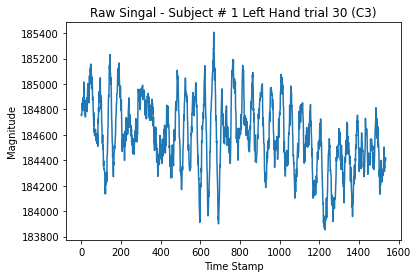

In [21]:
plt.plot(left[30][2])
plt.ylabel('Magnitude')
plt.xlabel('Time Stamp')
plt.title('Raw Singal - Subject # 1 Left Hand trial 30 (C3)')
#plt.savefig('./drive/MyDrive/EEC174/Raw Singal - Subject # 1 Left Hand trial 30 (C3).png')
plt.show()

### Downsampled Data Via Average Pooling


In [22]:
def filter(input_array, window_size):
    total = []
    window = window_size
    new_length = 0
    for i in range(len(input_array)):
        one_trail = []
        for k in range(len(input_array[i])):
            one_channel = []
            for y in range(len(input_array[i][k])):
                if y >= window:
                    sum = input_array[i][k][y-window:y].sum()
                    avg = sum / window
                    one_channel.append(avg)
            one_trail.append(one_channel)
            new_length = len(one_channel)
        total.append(one_trail)
    return total, new_length

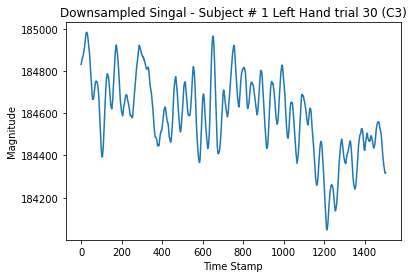

In [23]:
left, new_timesteps = filter(left, 32) 
right, new_timesteps = filter(right, 32)

plt.plot(left[30][2])
plt.ylabel('Magnitude')
plt.xlabel('Time Stamp')
plt.title('Downsampled Singal - Subject # 1 Left Hand trial 30 (C3)')
#plt.savefig('./drive/MyDrive/EEC174/Downsampled Singal - Subject # 1 Left Hand trial 30 (C3).png')
plt.show()

### Zero Center

In [24]:
def shift(input_data):
    output = np.array(input_data)
    for i in range(len(input_data)):
        for j in range(4):
          output[i][j] = output[i][j] - sum(output[i][j]) / 1504
    return output.tolist()

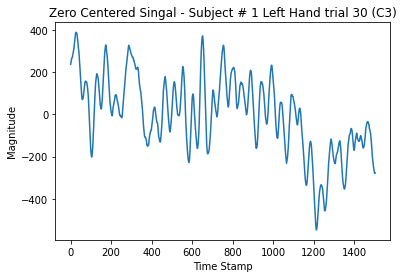

In [25]:
left = shift(left)
right = shift(right)

plt.plot(left[30][2])
plt.ylabel('Magnitude')
plt.xlabel('Time Stamp')
plt.title('Zero Centered Singal - Subject # 1 Left Hand trial 30 (C3)')
#plt.savefig('./drive/MyDrive/EEC174/Zero Centered Singal - Subject # 1 Left Hand trial 30 (C3).png')
plt.show()

### Reshape the data for the model


In [26]:
def reshape(input_array):
    output_array = []
    for i in range(len(input_array)):
        each_trail = []
        before_trans = np.array(input_array[i])
        output_array.append(before_trans.transpose())
    return output_array

### Prep data for training 

In [28]:
from sklearn.preprocessing import StandardScaler
def normalize(input_data):
    output_data = []
    for i in range(len(input_data)):
        scaler = StandardScaler()
        scaler.fit(input_data[i])
        scaled_X = scaler.transform(input_data[i])
        output_data.append(scaled_X)
    return output_data

In [29]:
label = []
X = []
for i in range(len(left)):
    label.append([0]) #set left to 1 and right to 0
    X.append(left[i])
for y in range(len(right)):
    label.append([1])
    X.append(right[y])

#shuffle arrays for randomness:
temp = list(zip(X, label)) 
random.shuffle(temp) 
X, label = zip(*temp) 
X = np.array(X)
label = np.array(label)

element_num = len(X)
train_index = element_num * 0.8 #choose 80% for training and 20% for validation
train_index = math.floor(train_index)
scaled_X = normalize(X) #normalize input data
scaled_X = np.array(scaled_X)
train_X = scaled_X[:train_index]
train_label = label[:train_index]
test_X = scaled_X[train_index:]
test_label = label[train_index:]

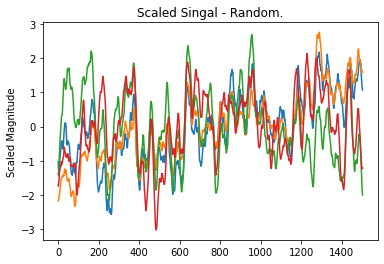

In [ ]:
plt.plot(scaled_X[30])
plt.ylabel('Scaled Magnitude')
plt.title('Scaled Singal - Random.')
plt.show()

### Build the neraul network

#### CNN

In [ ]:
n_features = 4
#write validation data into a tuple:
val_data = (test_X, test_label)
model = Sequential()
model.add(Conv1D(filters=250, #200 get 0.6955
                 kernel_size=75,
                 strides=1,
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.6))
model.add(Conv1D(filters=250,
                 kernel_size=75,
                 strides=1,
                 activation='relu',
                 padding='same'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(4))
model.add(Conv1D(75, 75, activation='relu'))
# model.add(Conv1D(160, 100, activation='relu'))
model.add(GlobalAveragePooling1D())
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
sgd = tf.keras.optimizers.SGD(0.001, 0.0, False) #0.0001 for combined dataset
model.compile(loss='binary_crossentropy',
              # optimizer='adam',
              optimizer=sgd,
              metrics=['accuracy'])
model.summary()
cnn = model.fit(train_X, train_label, batch_size=16, epochs=50, validation_data=val_data)

Epoch 1/50
110/110 [==============================] - 39s 244ms/step - loss: 0.6927 - accuracy: 0.5295 - val_loss: 0.6840 - val_accuracy: 0.5932
Epoch 2/50
110/110 [==============================] - 26s 236ms/step - loss: 0.6648 - accuracy: 0.5813 - val_loss: 0.6705 - val_accuracy: 0.6205
Epoch 3/50
110/110 [==============================] - 26s 238ms/step - loss: 0.6484 - accuracy: 0.6034 - val_loss: 0.6560 - val_accuracy: 0.6273
Epoch 4/50
110/110 [==============================] - 26s 238ms/step - loss: 0.6217 - accuracy: 0.6358 - val_loss: 0.6400 - val_accuracy: 0.6432
Epoch 5/50
110/110 [==============================] - 26s 238ms/step - loss: 0.6069 - accuracy: 0.6625 - val_loss: 0.6305 - val_accuracy: 0.6659
Epoch 6/50
110/110 [==============================] - 26s 238ms/step - loss: 0.5990 - accuracy: 0.6534 - val_loss: 0.6244 - val_accuracy: 0.6591
Epoch 7/50
110/110 [==============================] - 26s 238ms/step - loss: 0.5916 - accuracy: 0.6682 - val_loss: 0.6172 - val_ac

In [ ]:
cnn1 = model.fit(train_X, train_label, batch_size=16, epochs=50, validation_data=val_data)

Epoch 1/50
30/30 [==============================] - 8s 255ms/step - loss: 0.5556 - accuracy: 0.7021 - val_loss: 0.6118 - val_accuracy: 0.6667
Epoch 2/50
30/30 [==============================] - 8s 258ms/step - loss: 0.5599 - accuracy: 0.6896 - val_loss: 0.6134 - val_accuracy: 0.6833
Epoch 3/50
30/30 [==============================] - 8s 258ms/step - loss: 0.5666 - accuracy: 0.6979 - val_loss: 0.6106 - val_accuracy: 0.7083
Epoch 4/50
30/30 [==============================] - 8s 259ms/step - loss: 0.5397 - accuracy: 0.7271 - val_loss: 0.6100 - val_accuracy: 0.6833
Epoch 5/50
30/30 [==============================] - 8s 259ms/step - loss: 0.5725 - accuracy: 0.7042 - val_loss: 0.6116 - val_accuracy: 0.7083
Epoch 6/50
30/30 [==============================] - 8s 259ms/step - loss: 0.5411 - accuracy: 0.7188 - val_loss: 0.6078 - val_accuracy: 0.6750
Epoch 7/50
30/30 [==============================] - 8s 258ms/step - loss: 0.5383 - accuracy: 0.7208 - val_loss: 0.6064 - val_accuracy: 0.6917
Epoch 

### Load and Save Model 

In [ ]:
model.save('./drive/MyDrive/EEC 174 - BMI Project/4-Channel-model')

INFO:tensorflow:Assets written to: ./drive/MyDrive/EEC174/4-Channel-model/assets


In [31]:
model = keras.models.load_model("./drive/MyDrive/EEC 174 - BMI Project/4-Channel-model")

#Vizulize Results

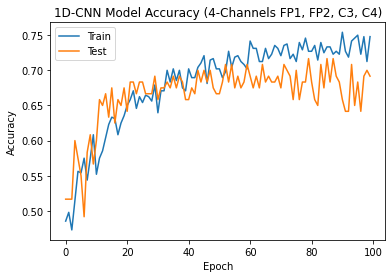

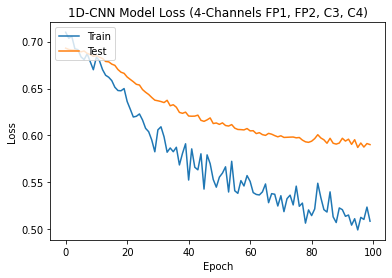

In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn.history.get("accuracy")+cnn1.history.get("accuracy"))
plt.plot(cnn.history.get("val_accuracy")+cnn1.history.get("val_accuracy"))
plt.title('1D-CNN Model Accuracy (4-Channels FP1, FP2, C3, C4)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC174/1D-CNN Model accuracy for 4-Channels.png')
plt.show()

# Plot training & validation loss values
plt.plot(cnn.history.get("loss")+cnn1.history.get("loss"))
plt.plot(cnn.history.get("val_loss")+cnn1.history.get("val_loss"))
plt.title('1D-CNN Model Loss (4-Channels FP1, FP2, C3, C4)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC174/1D-CNN Model loss for 4-Channels.png')
plt.show()

### Prep Collected Data 1-20 Trials of Both Left and Right Hand

In [33]:
left, new_timesteps = filter(Ldata_collected, 32) 
right, new_timesteps = filter(Rdata_collected, 32)
left = shift(left)
right = shift(right)
right = reshape(right)
left = reshape(left)

label = []
X = []
# Add Labeles
for i in range(len(left)):
    label.append([0]) #set left to 1 and right to 0
    X.append(left[i])
for y in range(len(right)):
    label.append([1])
    X.append(right[y])

#shuffle arrays for randomness:
temp = list(zip(X, label)) 
random.shuffle(temp) 
X, label = zip(*temp) 
X = np.array(X)
label = np.array(label)

element_num = len(X)
train_index = element_num * 0.8 #choose 80% for training and 20% for validation
train_index = math.floor(train_index)
scaled_X = normalize(X) #normalize input data
scaled_X = np.array(scaled_X)
train_X = scaled_X[:train_index]
train_label = label[:train_index]
test_X = scaled_X[train_index:]
test_label = label[train_index:]

val_data = (test_X, test_label)

### Test on All 20 Left collected data and 20 Right collected data

In [34]:
score = model.evaluate(scaled_X, label, verbose=0)
print(score)      #Score[0] is loss value and Score[1] is Accuracy

[0.6371338367462158, 0.625]


### Do Transfer Learning with 80:20 split

In [ ]:
cnn2 = model.fit(train_X, train_label, batch_size=8, epochs=100, validation_data=val_data)

Epoch 1/100
4/4 [==============================] - 2s 312ms/step - loss: 0.8341 - accuracy: 0.5000 - val_loss: 0.5375 - val_accuracy: 0.7500
Epoch 2/100
4/4 [==============================] - 1s 161ms/step - loss: 0.6622 - accuracy: 0.6875 - val_loss: 0.5456 - val_accuracy: 0.7500
Epoch 3/100
4/4 [==============================] - 1s 159ms/step - loss: 0.7078 - accuracy: 0.6250 - val_loss: 0.5572 - val_accuracy: 0.7500
Epoch 4/100
4/4 [==============================] - 1s 158ms/step - loss: 0.6487 - accuracy: 0.6562 - val_loss: 0.5822 - val_accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 1s 155ms/step - loss: 0.5300 - accuracy: 0.8125 - val_loss: 0.5620 - val_accuracy: 0.7500
Epoch 6/100
4/4 [==============================] - 1s 159ms/step - loss: 0.5919 - accuracy: 0.6562 - val_loss: 0.5622 - val_accuracy: 0.7500
Epoch 7/100
4/4 [==============================] - 1s 156ms/step - loss: 0.6137 - accuracy: 0.6250 - val_loss: 0.5687 - val_accuracy: 0.7500
Epoch 8/100
4

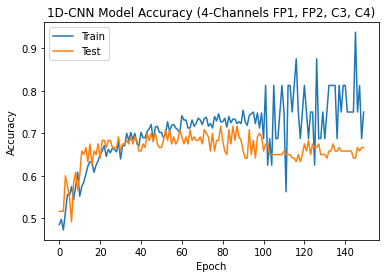

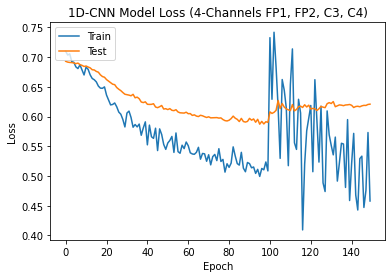

In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn.history.get("accuracy")+cnn1.history.get("accuracy")+cnn2.history.get("accuracy"))
plt.plot(cnn.history.get("val_accuracy")+cnn1.history.get("val_accuracy")+cnn2.history.get("val_accuracy"))
plt.title('1D-CNN Model Accuracy (4-Channels FP1, FP2, C3, C4)')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC 174 - BMI Project/1D-CNN Model accuracy for 4-Channels Retrained.png')
plt.show()

# Plot training & validation loss values
plt.plot(cnn.history.get("loss")+cnn1.history.get("loss")+cnn2.history.get("loss"))
plt.plot(cnn.history.get("val_loss")+cnn1.history.get("val_loss")+cnn2.history.get("val_loss"))
plt.title('1D-CNN Model Loss (4-Channels FP1, FP2, C3, C4)')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC 174 - BMI Project/1D-CNN Model loss for 4-Channels Retrained.png')
plt.show()

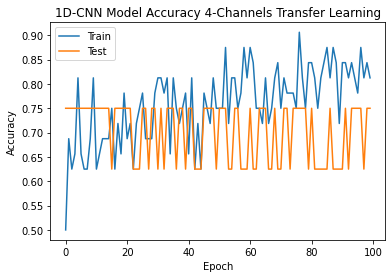

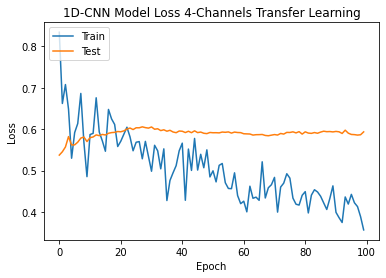

In [ ]:
# Plot training & validation accuracy values
plt.plot(cnn2.history.get("accuracy"))
plt.plot(cnn2.history.get("val_accuracy"))
plt.title('1D-CNN Model Accuracy 4-Channels Transfer Learning')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC 174 - BMI Project/1D-CNN Model Accuracy 4-Channels Transfer Learning.png')
plt.show()

# Plot training & validation loss values
plt.plot(cnn2.history.get("loss"))
plt.plot(cnn2.history.get("val_loss"))
plt.title('1D-CNN Model Loss 4-Channels Transfer Learning')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
#plt.savefig('./drive/MyDrive/EEC 174 - BMI Project/1D-CNN Model Loss 4-Channels Transfer Learning.png')
plt.show()

### Prep Collected Data 21-30 Trials of Both Left and Right Hand

In [37]:
left, new_timesteps = filter(Ldata_collected_test, 32) 
right, new_timesteps = filter(Rdata_collected_test, 32)
left = shift(left)
right = shift(right)
right = reshape(right)
left = reshape(left)

label = []
X = []
# Add Labeles
for i in range(len(left)):
    label.append([0]) #set left to 1 and right to 0
    X.append(left[i])
for y in range(len(right)):
    label.append([1])
    X.append(right[y])

X = np.array(X)
label = np.array(label)

scaled_X = normalize(X) #normalize input data
scaled_X = np.array(scaled_X)

In [38]:
score = model.evaluate(scaled_X, label, verbose=0)
print(score[1])           #Score[0] is loss value and Score[1] is Accuracy

0.949999988079071


In [ ]:
model.save('./drive/MyDrive/EEC 174 - BMI Project/4-Channel-model-tranferlearning')

INFO:tensorflow:Assets written to: ./drive/MyDrive/EEC174/4-Channel-model-tranferlearning/assets


In [36]:
model = keras.models.load_model("./drive/MyDrive/EEC 174 - BMI Project/4-Channel-model-tranferlearning")